Import libraries and set global configurations

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# statsmodels library for statistical summary
import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor

# scikitlearn library for model building and analysis 
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# suppress warnings from libraries for cleaner looking outputs
import warnings
warnings.filterwarnings('ignore')

plt.rcParams.update({'font.size': 15}) #Setting font size for the plots
pd.set_option('display.max_rows', 500) #Settting display options
pd.set_option('display.max_columns', 500)

Load data

In [2]:
data = pd.read_csv('day.csv')

_____________________________
# Data Understanding, Preparation and EDA

In [3]:
print(f"Data Shape: {data.shape}")
data.head()

Data Shape: (730, 16)


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


The dataset has 16 different variables and 730 entries. Let us get a better picture of what each column contains.

In [4]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


Most of the columns are in integer or float. However some of the columns hold categorical values which are denoted by integers. We will convert these into dummy values in a while.

Before that, let us check the number of null values in each column of the dataset.

In [5]:
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

The dataset does not have any null entries.

Let us investigate each column now.

The "instant" column is just an index to the number of data entries in the dataset. This can be removed as this will not help in our data analysis

In [6]:
data.drop(['instant'],axis=1,inplace=True)

The "dteday" column has the similar data as the "yr", "month", "workingday", "weekday" columns. Thus, having "dteday" column would be redundant and can be removed.

In [7]:
data.drop(['dteday'],axis=1,inplace=True)

Looking at the data again

In [8]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


We see there are two different columns for temperature "temp" denoting the actual temperature and "atemp" denoting the feeling temperature. By intuition, this feels more correlated by their meanings. Let us check that out.

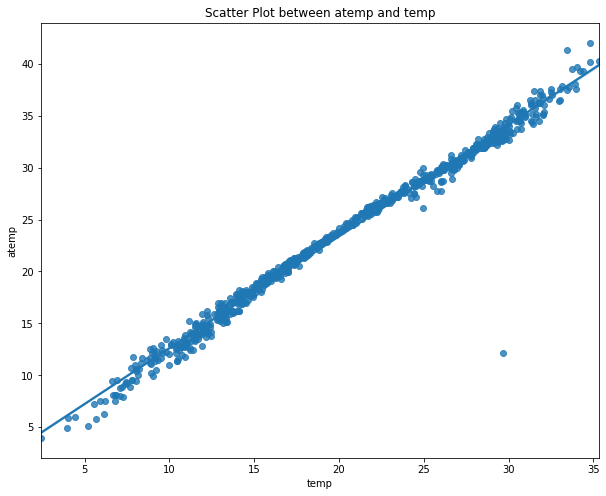

In [9]:
plt.figure(figsize=(10,8))
sns.regplot(data.temp,data.atemp)
plt.title('Scatter Plot between atemp and temp')
plt.show()

From the graph, it looks "atemp" and "temp" are highly correlated. Let us get the Pearson's correlation coefficient of this graph.

In [10]:
corr = data.temp.corr(data.atemp)
print(f"Correlation between atemp and temp: {corr}")

Correlation between atemp and temp: 0.991696178690565


As expected, the correlation coefficient is very close to 1. So one of these two columns can be dropped. Keeping "atemp" column

In [11]:
data.drop(['temp'],axis=1,inplace=True)

Looking at the dataset again

In [12]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,11.46350,43.6957,12.522300,82,1518,1600


Columns "casual" and "registered" represent the number of casual users and count of registered users respectively. As we already have another column "cnt" representing an addition of these two columns, let us try to understand if we would need the "casual" and "registered" columns separately.

Checking the correlation value between the registered users and total users. Similarly, doing the same with casual users.

In [13]:
print(f"Correlation value between casual users and total users: {data.casual.corr(data.cnt)}")
print(f"Correlation value between registered users and total users: {data.registered.corr(data.cnt)}")

Correlation value between casual users and total users: 0.6721234097443972
Correlation value between registered users and total users: 0.9454106118483708


We could see a high correlation between the number of registered users and the total number of users. But we do not see a similar correlation with number of casual users.

There could be a chance that the number of casual users are more on the non-working days as people who go out for leisure would pick the bicycles casually. Let us check this possibility.

Creating a dataset with only non-working day data and check correlation between number of casual users and total users.

In [14]:
new_data = data[data.workingday==0]
casual_corr = new_data.casual.corr(new_data.cnt)
print(f"Correlation value between number of casual users and total users on non-working day: {casual_corr}")

Correlation value between number of casual users and total users on non-working day: 0.9207791832931785


The correlation is very high between casual users and total users for non-working day which validates our assumption that more casual users rent it on non-working day.

For the sake of completeness, let us do the same analysis for **working days** as well with the registered users.

In [15]:
new_data = data[data.workingday==1]
registered_corr = new_data.registered.corr(new_data.cnt)
print(f"Correlation value between number of registered users and total users on working day: {registered_corr}")

Correlation value between number of registered users and total users on working day: 0.9902328970401938


We could see the correlation value is close to 1 between number of registered users and total users on working days. 

The above findings on correlation on the "casual" and "registered" columns over "cnt" column shows that the individual "casual" and "registered" columns does not bring in much value. We could use only the total users "cnt" column and eliminate the other two for our data analysis.

In [16]:
data.drop(['casual', 'registered'], axis=1,inplace=True)

Looking at the data again

In [17]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,11.46350,43.6957,12.522300,1600


We could see that the "atemp", "hum", "windspeed", "cnt" are continuous numerical variables. Let us check the correlation between these variables.

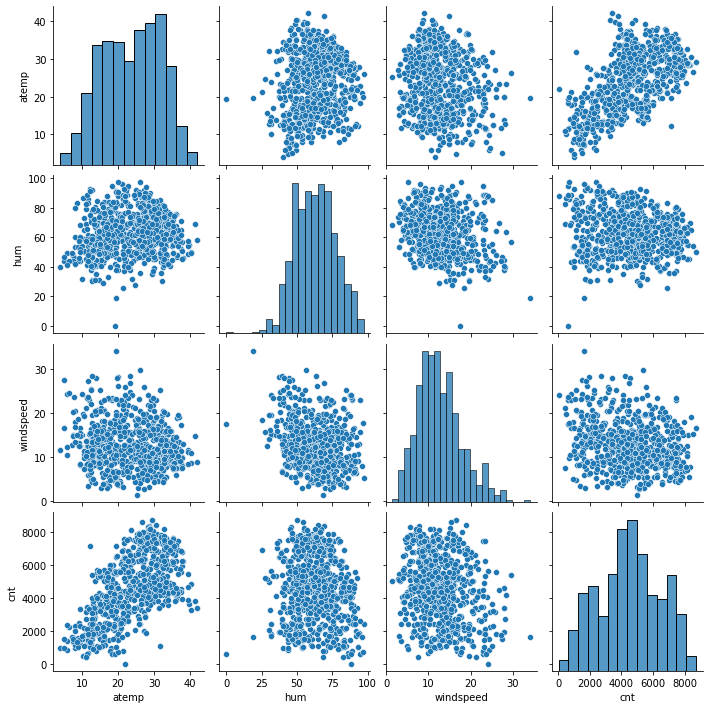

In [18]:
sns.pairplot(data, vars=["atemp", "hum", "windspeed", "cnt" ])
plt.show()

From the above graph, we could see that cnt which is the target variable is correlated with atemp. 

Otherwise, the independent variables do not have significant correlation among each other. This is a good sign. To be more confident, let us look at the correlation values between these variables.

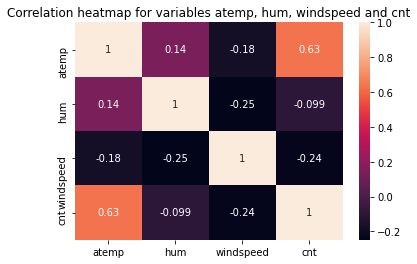

In [19]:
plt.title("Correlation heatmap for variables atemp, hum, windspeed and cnt")
sns.heatmap(data[['atemp', 'hum', 'windspeed', 'cnt']].corr(),annot=True)
plt.show()

Based on the values provided in the above plot, we could observe that that are no two independent variables that are highly correlated.

Now, checking the demand pattern of bikes with different variables.

Let us check which day of the week has the highest average number of total users.

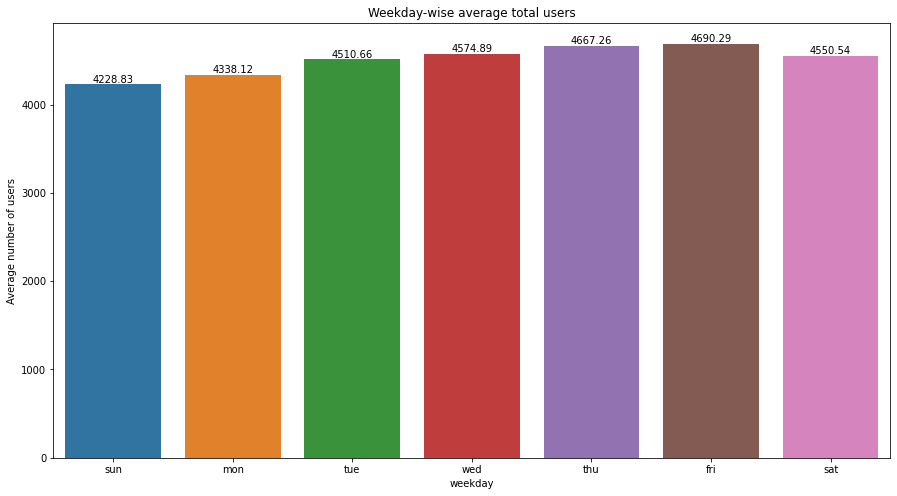

In [20]:
plt.figure(figsize=(15,8))
weekday_data = data.groupby('weekday')['cnt'].mean()
ax = sns.barplot(weekday_data.index, weekday_data)
ax.bar_label(ax.containers[0])
plt.xticks([0,1,2,3,4,5,6], ['sun', 'mon', 'tue', 'wed', 'thu', 'fri', 'sat'])
plt.title('Weekday-wise average total users')
plt.ylabel('Average number of users')
plt.show()

From the above graph , it could be seen that, Fridays have the highest usage and sundays have the least.

Similarly, let us check which month has the highest average number of total users.

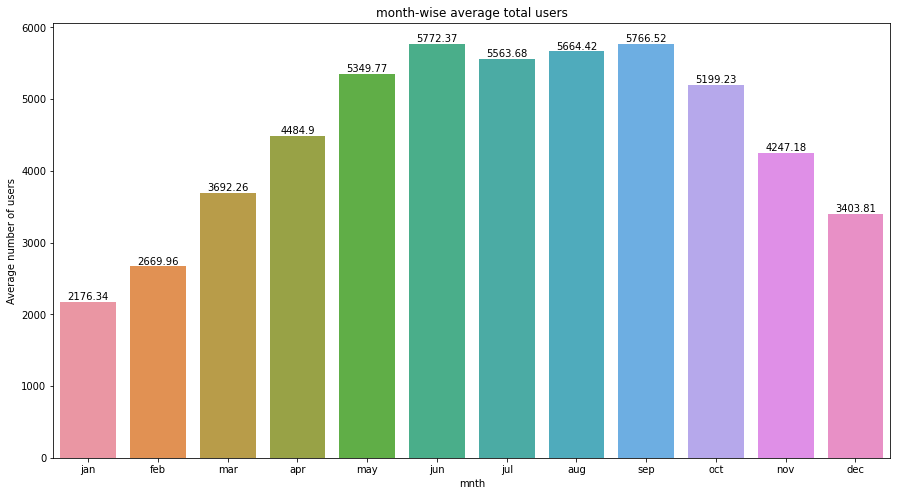

In [21]:
plt.figure(figsize=(15,8))
month_data = data.groupby('mnth')['cnt'].mean()
ax = sns.barplot(month_data.index, month_data)
ax.bar_label(ax.containers[0])
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],
           ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
plt.title('month-wise average total users')
plt.ylabel('Average number of users')
plt.show()

From the above graph, it could be noticed that the average total number of users is high during the months of June and September. The demand is low during the months of January and February.

Let us check the average demand for bikes across seasons

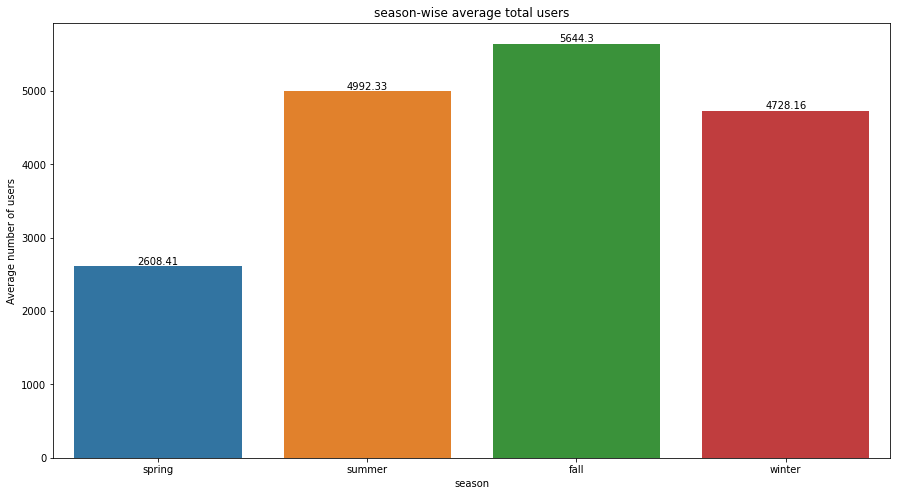

In [22]:
plt.figure(figsize=(15,8))
month_data = data.groupby('season')['cnt'].mean()
ax = sns.barplot(month_data.index, month_data)
ax.bar_label(ax.containers[0])
plt.xticks([0,1,2,3],
           ['spring', 'summer', 'fall', 'winter'])
plt.title('season-wise average total users')
plt.ylabel('Average number of users')
plt.show()

We see that more number of users rent bikes during the fall season and very less during the spring season.

Let us check the demand for bikes with respect to "weathersit" variable

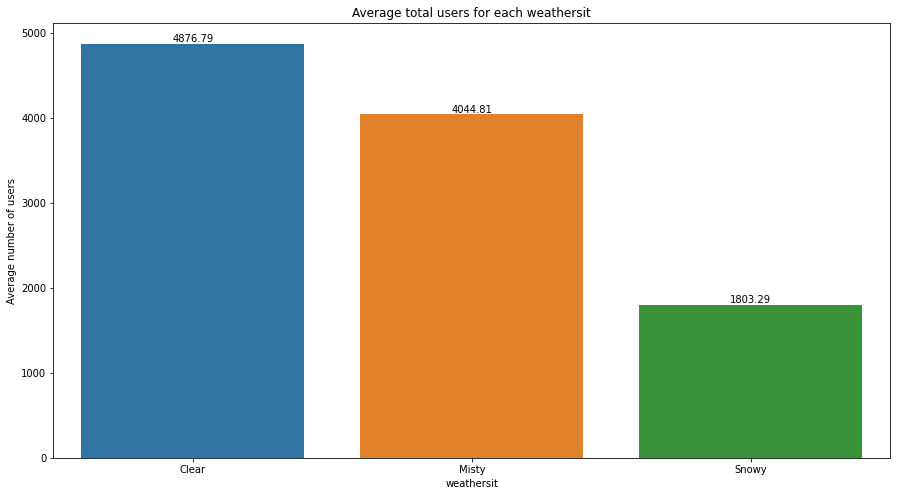

In [23]:
plt.figure(figsize=(15,8))
weekday_data = data.groupby('weathersit')['cnt'].mean()
ax = sns.barplot(weekday_data.index, weekday_data)
ax.bar_label(ax.containers[0])
plt.xticks([0,1,2], ['Clear', 'Misty', 'Snowy'])
plt.title('Average total users for each weathersit')
plt.ylabel('Average number of users')
plt.show()

The demand for bikes is high when there is clear weather.

Let us check the demand for bikes with respect to "workingday" variable

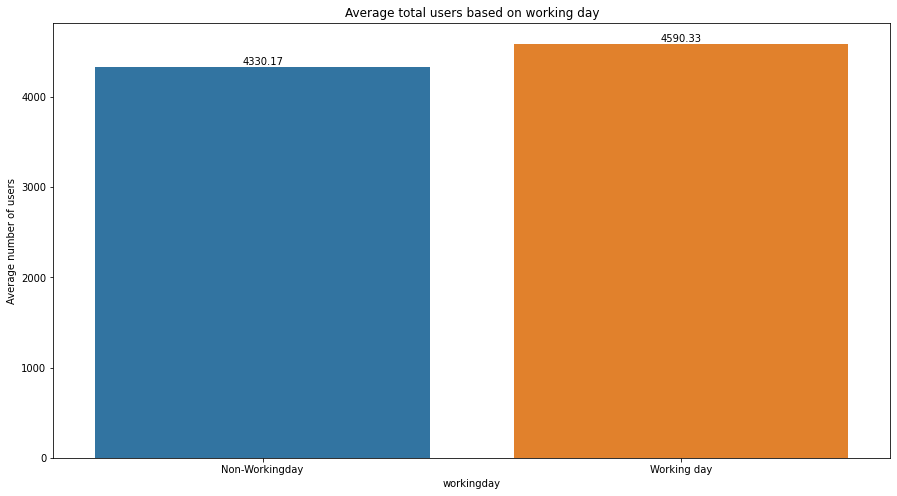

In [24]:
plt.figure(figsize=(15,8))
weekday_data = data.groupby('workingday')['cnt'].mean()
ax = sns.barplot(weekday_data.index, weekday_data)
ax.bar_label(ax.containers[0])
plt.xticks([0,1], ['Non-Workingday', 'Working day'])
plt.title('Average total users based on working day')
plt.ylabel('Average number of users')
plt.show()

The number of users increases on Working days.

## Dummy Variables Creation


In [25]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,11.46350,43.6957,12.522300,1600


"season", "yr", "mnth", "holiday", "weekday", "workingday" and "weathersit" are categorical columns in our dataset. Let us create dummy variables for these data.

#### "season" variable

The "season" variable has 4 distinct categories denoted by integers 1 to 4 mapping to 4 different seasons namely 
- 1:spring
- 2:summer
- 3:fall
- 4:winter

Let us create dummy variables for the "season" column. This can be represented by 3 variables with "spring" denoted by all 3 dummy variables as 0s.

- 000 will correspond to spring
- 100 will correspond to summer
- 010 will correspond to fall
- 001 will correspond to winter

In [26]:
season_data = pd.get_dummies(data.season, drop_first=True)
season_data.columns = ['summer','fall','winter']
season_data.head()

,summer,fall,winter
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


Now concatenating the new season data to original dataset. Also, removing the "season" column from the original dataset.

In [27]:
data = pd.concat([data, season_data], axis=1)
data.drop(['season'], axis=1, inplace=True)
data.head()

,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,summer,fall,winter
0,0,1,0,6,0,2,18.18125,80.5833,10.749882,985,0,0,0
1,0,1,0,0,0,2,17.68695,69.6087,16.652113,801,0,0,0
2,0,1,0,1,1,1,9.47025,43.7273,16.636703,1349,0,0,0
3,0,1,0,2,1,1,10.60610,59.0435,10.739832,1562,0,0,0
4,0,1,0,3,1,1,11.46350,43.6957,12.522300,1600,0,0,0


#### "yr" variable

The "yr" variable is denoted by either 0 or 1 denoting 2018 and 2019 respectively. We do not need to create any new dummy variables for this column.

#### "month" variable

The "month" variable is denoted by integers from 1 to 12 denoting the 12 months. Let us create dummy variables for this column with the month January as the base category i.e. January denoted by all zeros.

In [28]:
month_data = pd.get_dummies(data.mnth, drop_first=True)
month_data.columns = ['feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
month_data.head()

,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0


Now concatenating the new month data to original dataset. Also, removing the "mnth" column from the original dataset.

In [29]:
data = pd.concat([data, month_data], axis=1)
data.drop(['mnth'], axis=1,inplace=True)
data.head()

,yr,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,summer,fall,winter,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
0,0,0,6,0,2,18.18125,80.5833,10.749882,985,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,2,17.68695,69.6087,16.652113,801,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,1,1,9.47025,43.7273,16.636703,1349,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,2,1,1,10.60610,59.0435,10.739832,1562,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,3,1,1,11.46350,43.6957,12.522300,1600,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### "holiday" variable

The "holiday" variable is denoted by either 0 or 1 denoting whether the day is a holiday or not. We do not need to create any new dummy variables for this column.

#### "weekday" variable

The "weekday" variable is denoted by integers from 0 to 6 denoting the 7 days of the week. Let us create dummy variables for this column with the day sunday as the base category i.e. sunday denoted by all zeros.

In [30]:
week_data = pd.get_dummies(data.weekday, drop_first=True)
week_data.columns = ['mon', 'tue', 'wed', 'thu', 'fri', 'sat']
week_data.head()

,mon,tue,wed,thu,fri,sat
0,0,0,0,0,0,1
1,0,0,0,0,0,0
2,1,0,0,0,0,0
3,0,1,0,0,0,0
4,0,0,1,0,0,0


Now concatenating the new week data to original dataset. Also, removing the "weekday" column from the original dataset.

In [31]:
data = pd.concat([data, week_data], axis=1)
data.drop(['weekday'], axis=1,inplace=True)
data.head()

,yr,holiday,workingday,weathersit,atemp,hum,windspeed,cnt,summer,fall,winter,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,mon,tue,wed,thu,fri,sat
0,0,0,0,2,18.18125,80.5833,10.749882,985,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,2,17.68695,69.6087,16.652113,801,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,1,9.47025,43.7273,16.636703,1349,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,1,1,10.60610,59.0435,10.739832,1562,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,1,1,11.46350,43.6957,12.522300,1600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


#### "workingday" variable

The "workingday" variable is denoted by either 0 or 1 denoting whether the day is a working day or not. We do not need to create any new dummy variables for this column.

#### "weathersit" variable

The "weathersit" variable is denoted by integers from 1 to 4 each denoting a different weather scenario. These are:

- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

Let us check the dataset for the unique values used in this column.

In [32]:
data.weathersit.unique()

array([2, 1, 3])

It could be seen that, we do not have the category 4 in any of our data entries. Thus, we could restrict the number of dummy variables from this column to only 2 with "Clear" as the base variable i.e. "Clear" denoted by all zeros.

In [33]:
weather_data = pd.get_dummies(data.weathersit, drop_first=True)
weather_data.columns = ['misty', 'snowy']
weather_data.head()

,misty,snowy
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


Now concatenating the new weather data to original dataset. Also, removing the "weathersit" column from the original dataset.

In [34]:
data = pd.concat([data, weather_data], axis=1)
data.drop(['weathersit'], axis=1,inplace=True)
data.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,summer,fall,winter,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,mon,tue,wed,thu,fri,sat,misty,snowy
0,0,0,0,18.18125,80.5833,10.749882,985,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,0,0,0,17.68695,69.6087,16.652113,801,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,1,9.47025,43.7273,16.636703,1349,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


Now that we have prepared the data for the data analysis.

# Model Building and Evaluation

Before building model, let us split the original dataset into training and test datasets.

In [35]:
train_data, test_data = train_test_split(data, train_size=0.7, random_state=2)

In [36]:
print("Train data shape:", train_data.shape)
print("Test data shape:", test_data.shape)

Train data shape: (510, 29)
Test data shape: (220, 29)


In [37]:
data.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,summer,fall,winter,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,mon,tue,wed,thu,fri,sat,misty,snowy
0,0,0,0,18.18125,80.5833,10.749882,985,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,0,0,0,17.68695,69.6087,16.652113,801,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,1,9.47025,43.7273,16.636703,1349,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


From the dataset, we could see that the variables "cnt", "atemp", "hum", "windspeed" have different value ranges and need to be scaled to same range for faster convergence of the linear regression model. 

Using MinMaxScaler to scale the data using min-max values.

In [38]:
variables = ["cnt", "atemp","hum", "windspeed"]
scaler = MinMaxScaler()
train_data[variables]=scaler.fit_transform(train_data[variables])
train_data.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,summer,fall,winter,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,mon,tue,wed,thu,fri,sat,misty,snowy
573,1,0,0,0.811910,0.549219,0.278224,0.766567,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
267,0,0,0,0.647874,0.848305,0.057698,0.573861,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
551,1,0,1,0.884012,0.339429,0.255118,0.711574,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
236,0,0,1,0.743981,0.753631,0.388482,0.404970,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
370,1,0,1,0.342857,0.457234,0.299990,0.468937,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


The data is now scaled to have min and max values as 0 and 1 respectively. Let us verify this using describe function.

In [39]:
train_data[["cnt", "atemp","hum", "windspeed"]].describe()

,cnt,atemp,hum,windspeed
count,510.000000,510.000000,510.000000,510.000000
mean,0.511147,0.514429,0.569490,0.346355
std,0.224394,0.216933,0.181966,0.158454
min,0.000000,0.000000,0.000000,0.000000
25%,0.344052,0.324628,0.426638,0.234958
50%,0.516337,0.519376,0.571812,0.329488
75%,0.691584,0.694255,0.699300,0.430793
max,1.000000,1.000000,1.000000,1.000000


In [40]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 573 to 168
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          510 non-null    int64  
 1   holiday     510 non-null    int64  
 2   workingday  510 non-null    int64  
 3   atemp       510 non-null    float64
 4   hum         510 non-null    float64
 5   windspeed   510 non-null    float64
 6   cnt         510 non-null    float64
 7   summer      510 non-null    uint8  
 8   fall        510 non-null    uint8  
 9   winter      510 non-null    uint8  
 10  feb         510 non-null    uint8  
 11  mar         510 non-null    uint8  
 12  apr         510 non-null    uint8  
 13  may         510 non-null    uint8  
 14  jun         510 non-null    uint8  
 15  jul         510 non-null    uint8  
 16  aug         510 non-null    uint8  
 17  sep         510 non-null    uint8  
 18  oct         510 non-null    uint8  
 19  nov         510 non-null   

Now, separating the target variable from the train_data and test_data. The target variable is the "cnt" variable from the original dataset.

In [41]:
y_train = train_data.pop('cnt') # Removing target variable and assigning the target variable to y_train
X_train = train_data

In [42]:
print("Train data shape:", X_train.shape)
print("Train target shape:", y_train.shape)

Train data shape: (510, 28)
Train target shape: (510,)


Now that we have prepared the data, the next step is to find the best features (variables) that need to be picked up for the model building.


We will be using Recursive Feature Elimination (RFE) techinque to figure out the best features for the model. We have 28 variables currently. Let us target 50% of 28 i.e. 14 best variables using RFE technique.

In [43]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 14)
rfe = rfe.fit(X_train, y_train)

Checking the RFE selected features

In [44]:
rfe_support = pd.DataFrame([rfe.support_,rfe.ranking_], columns = X_train.columns).T
rfe_support.columns = ['Support', 'Ranking']
rfe_support = rfe_support.sort_values('Ranking')
rfe_support

,Support,Ranking
yr,True,1
oct,True,1
sep,True,1
aug,True,1
misty,True,1
may,True,1
winter,True,1
snowy,True,1
summer,True,1
fall,True,1


The columns below are selected by RFE analysis.

In [45]:
selected_columns = X_train.columns[rfe.support_]
print(selected_columns)

Index(['yr', 'holiday', 'atemp', 'hum', 'windspeed', 'summer', 'fall',
       'winter', 'may', 'aug', 'sep', 'oct', 'misty', 'snowy'],
      dtype='object')


Let us build a model using these features with statsmodels library. Also we will check the statistical summary out of it.

In [46]:
def get_model_summary(X):
    X_const = sm.add_constant(X) # Introduce constant value
    model = sm.OLS(y_train, X_const).fit()
    display(model.summary())
    return model

In [47]:
def get_VIF(X):
    # Creating a dataframe that will contain the names of all the feature varaiables and their respective VIFs
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    vif = vif.sort_values(by = 'VIF', ascending = False)
    print("Featurewise VIF values")
    display(vif)

### model 1

In [48]:
X_train_1 = X_train[selected_columns]
model_1 = get_model_summary(X_train_1)
get_VIF(X_train_1)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.4
Date:                Wed, 09 Nov 2022   Prob (F-statistic):          4.91e-186
Time:                        22:14:43   Log-Likelihood:                 504.88
No. Observations:                 510   AIC:                            -979.8
Df Residuals:                     495   BIC:                            -916.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2276      0.024      9.676      0.000       0.181       0.274
yr             0.2255      0.008     27.502      0.000       0.209       0.242
holiday       -0.0799      0.023     -3.429      0.001      -0.126      -0.034
atemp          0.4677      0.035     13.362      0.000       0.399       0.536
hum           -0.1833      0.032     -5.659      0.000      -0.247      -0.120
windspeed     -0.1753      0.028     -6.253      0.000      -0.230      -0.120
summer         0.1446      0.016      9.218      0.000       0.114       0.175
fall           0.0915      0.022      4.226      0.000       0.049       0.134
winter         0.1564      0.014     10.979      0.000       0.128       0.184
may            0.0228      0.018      1.255      0.210      -0.013       0.058
aug            0.0435      0.018      2.434      0.015       0.008       0.079
sep            0.1116      0.017      6.622      0.000       0.078       0.145
oct            0.0670      0.018      3.726      0.000       0.032       0.102
misty         -0.0455      0.011     -4.188      0.000      -0.067      -0.024
snowy         -0.1952      0.030     -6.524      0.000      -0.254      -0.136
==============================================================================
Omnibus:                       78.647   Durbin-Watson:                   1.899
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              194.658
Skew:                          -0.789   Prob(JB):                     5.38e-43
Kurtosis:                       5.583   Cond. No.                         16.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Featurewise VIF values


,Features,VIF
2,atemp,21.04
3,hum,13.14
6,fall,7.51
4,windspeed,3.92
5,summer,3.62
7,winter,2.91
12,misty,2.29
0,yr,1.97
9,aug,1.76
11,oct,1.61


The statistical summary shows a high R-squared value of 0.839 and a high F-statistic score. "may" variable has the highest p-value. Let us try to eliminate this variable and check the effect on the model.

### model 2

In [49]:
X_train_2 = X_train_1.drop('may', axis=1)
model_2 = get_model_summary(X_train_2)
get_VIF(X_train_2)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     198.3
Date:                Wed, 09 Nov 2022   Prob (F-statistic):          7.47e-187
Time:                        22:14:43   Log-Likelihood:                 504.07
No. Observations:                 510   AIC:                            -980.1
Df Residuals:                     496   BIC:                            -920.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2236      0.023      9.589      0.000       0.178       0.269
yr             0.2257      0.008     27.504      0.000       0.210       0.242
holiday       -0.0801      0.023     -3.435      0.001      -0.126      -0.034
atemp          0.4742      0.035     13.689      0.000       0.406       0.542
hum           -0.1776      0.032     -5.534      0.000      -0.241      -0.115
windspeed     -0.1761      0.028     -6.283      0.000      -0.231      -0.121
summer         0.1497      0.015      9.882      0.000       0.120       0.179
fall           0.0880      0.021      4.095      0.000       0.046       0.130
winter         0.1550      0.014     10.908      0.000       0.127       0.183
aug            0.0434      0.018      2.425      0.016       0.008       0.079
sep            0.1112      0.017      6.594      0.000       0.078       0.144
oct            0.0663      0.018      3.685      0.000       0.031       0.102
misty         -0.0467      0.011     -4.313      0.000      -0.068      -0.025
snowy         -0.1978      0.030     -6.620      0.000      -0.256      -0.139
==============================================================================
Omnibus:                       77.073   Durbin-Watson:                   1.906
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              183.825
Skew:                          -0.786   Prob(JB):                     1.21e-40
Kurtosis:                       5.486   Cond. No.                         16.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Featurewise VIF values


,Features,VIF
2,atemp,20.78
3,hum,13.07
6,fall,7.41
4,windspeed,3.83
5,summer,3.35
7,winter,2.89
11,misty,2.28
0,yr,1.96
8,aug,1.76
10,oct,1.61


Now that the p-values for all the variables are small. Let us experiment removing the features based on the VIF values. The highest VIF value is 20.78 for the "atemp" variable. Removing "atemp" variable for the experiment.

### model 3

In [50]:
X_train_3 = X_train_2.drop('atemp', axis=1)
model_3 = get_model_summary(X_train_3)
get_VIF(X_train_3)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     144.8
Date:                Wed, 09 Nov 2022   Prob (F-statistic):          1.33e-153
Time:                        22:14:43   Log-Likelihood:                 422.35
No. Observations:                 510   AIC:                            -818.7
Df Residuals:                     497   BIC:                            -763.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3201      0.026     12.282      0.000       0.269       0.371
yr             0.2359      0.010     24.621      0.000       0.217       0.255
holiday       -0.0812      0.027     -2.970      0.003      -0.135      -0.027
hum           -0.0731      0.037     -2.000      0.046      -0.145      -0.001
windspeed     -0.2039      0.033     -6.219      0.000      -0.268      -0.139
summer         0.2825      0.014     20.695      0.000       0.256       0.309
fall           0.3075      0.017     18.313      0.000       0.274       0.340
winter         0.2104      0.016     13.174      0.000       0.179       0.242
aug            0.0379      0.021      1.805      0.072      -0.003       0.079
sep            0.0945      0.020      4.791      0.000       0.056       0.133
oct            0.1082      0.021      5.207      0.000       0.067       0.149
misty         -0.0786      0.012     -6.330      0.000      -0.103      -0.054
snowy         -0.2564      0.035     -7.395      0.000      -0.324      -0.188
==============================================================================
Omnibus:                       53.191   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               98.527
Skew:                          -0.636   Prob(JB):                     4.03e-22
Kurtosis:                       4.737   Cond. No.                         15.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Featurewise VIF values


,Features,VIF
2,hum,8.42
3,windspeed,3.70
5,fall,3.18
6,winter,2.60
10,misty,2.07
4,summer,1.97
0,yr,1.91
7,aug,1.76
9,oct,1.58
8,sep,1.54


We see that removing "atemp" variable reduces the R-squared value from 0.839 to 0.778 which is a significant drop. To avoid underfitting of model, let us bring back the "atemp" variable and experiment by removing the other variables.

From model 2, we see that "aug" variable has the highest p-value among all the variables. Let us try experimenting with this variable.

### model 4

In [51]:
X_train_4 = X_train_2.drop('aug', axis=1)
model_4 = get_model_summary(X_train_4)
get_VIF(X_train_4)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.2
Date:                Wed, 09 Nov 2022   Prob (F-statistic):          9.22e-187
Time:                        22:14:43   Log-Likelihood:                 501.07
No. Observations:                 510   AIC:                            -976.1
Df Residuals:                     497   BIC:                            -921.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2215      0.023      9.458      0.000       0.175       0.267
yr             0.2256      0.008     27.360      0.000       0.209       0.242
holiday       -0.0822      0.023     -3.509      0.000      -0.128      -0.036
atemp          0.4723      0.035     13.571      0.000       0.404       0.541
hum           -0.1730      0.032     -5.375      0.000      -0.236      -0.110
windspeed     -0.1751      0.028     -6.216      0.000      -0.230      -0.120
summer         0.1498      0.015      9.841      0.000       0.120       0.180
fall           0.1073      0.020      5.346      0.000       0.068       0.147
winter         0.1568      0.014     11.000      0.000       0.129       0.185
sep            0.0960      0.016      6.102      0.000       0.065       0.127
oct            0.0644      0.018      3.566      0.000       0.029       0.100
misty         -0.0462      0.011     -4.241      0.000      -0.068      -0.025
snowy         -0.2003      0.030     -6.676      0.000      -0.259      -0.141
==============================================================================
Omnibus:                       81.884   Durbin-Watson:                   1.897
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              197.105
Skew:                          -0.829   Prob(JB):                     1.58e-43
Kurtosis:                       5.555   Cond. No.                         16.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Featurewise VIF values


,Features,VIF
2,atemp,20.75
3,hum,13.05
6,fall,6.36
4,windspeed,3.83
5,summer,3.35
7,winter,2.88
10,misty,2.28
0,yr,1.96
9,oct,1.61
8,sep,1.35


Let us experiment removing the next high VIF variable which is "hum".

### model 5

In [52]:
X_train_5 = X_train_4.drop('hum', axis=1)
model_5 = get_model_summary(X_train_5)
get_VIF(X_train_5)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     216.7
Date:                Wed, 09 Nov 2022   Prob (F-statistic):          7.23e-182
Time:                        22:14:43   Log-Likelihood:                 486.66
No. Observations:                 510   AIC:                            -949.3
Df Residuals:                     498   BIC:                            -898.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1401      0.018      7.633      0.000       0.104       0.176
yr             0.2311      0.008     27.491      0.000       0.215       0.248
holiday       -0.0868      0.024     -3.612      0.000      -0.134      -0.040
atemp          0.4280      0.035     12.318      0.000       0.360       0.496
windspeed     -0.1317      0.028     -4.750      0.000      -0.186      -0.077
summer         0.1522      0.016      9.733      0.000       0.121       0.183
fall           0.1194      0.020      5.825      0.000       0.079       0.160
winter         0.1519      0.015     10.394      0.000       0.123       0.181
sep            0.0831      0.016      5.198      0.000       0.052       0.114
oct            0.0635      0.019      3.423      0.001       0.027       0.100
misty         -0.0805      0.009     -8.878      0.000      -0.098      -0.063
snowy         -0.2747      0.027    -10.043      0.000      -0.328      -0.221
==============================================================================
Omnibus:                       78.399   Durbin-Watson:                   1.927
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              182.755
Skew:                          -0.807   Prob(JB):                     2.07e-40
Kurtosis:                       5.449   Cond. No.                         14.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Featurewise VIF values


,Features,VIF
2,atemp,13.38
5,fall,5.96
3,windspeed,3.56
4,summer,3.29
6,winter,2.83
0,yr,1.96
8,oct,1.60
9,misty,1.49
7,sep,1.32
10,snowy,1.09


Let us remove the "fall" column which has a high VIF value of 5.96 and see the effect on the model.

### model 6

In [53]:
X_train_6 = X_train_5.drop('fall', axis=1)
model_6 = get_model_summary(X_train_6)
get_VIF(X_train_6)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     220.5
Date:                Wed, 09 Nov 2022   Prob (F-statistic):          5.98e-176
Time:                        22:14:43   Log-Likelihood:                 469.85
No. Observations:                 510   AIC:                            -917.7
Df Residuals:                     499   BIC:                            -871.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1129      0.018      6.161      0.000       0.077       0.149
yr             0.2292      0.009     26.428      0.000       0.212       0.246
holiday       -0.0927      0.025     -3.738      0.000      -0.141      -0.044
atemp          0.5888      0.022     27.047      0.000       0.546       0.632
windspeed     -0.1268      0.029     -4.430      0.000      -0.183      -0.071
summer         0.0857      0.011      7.767      0.000       0.064       0.107
winter         0.1082      0.013      8.355      0.000       0.083       0.134
sep            0.1040      0.016      6.470      0.000       0.072       0.136
oct            0.0512      0.019      2.692      0.007       0.014       0.089
misty         -0.0780      0.009     -8.341      0.000      -0.096      -0.060
snowy         -0.2722      0.028     -9.638      0.000      -0.328      -0.217
==============================================================================
Omnibus:                       54.770   Durbin-Watson:                   1.928
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              136.033
Skew:                          -0.555   Prob(JB):                     2.89e-30
Kurtosis:                       5.274   Cond. No.                         10.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Featurewise VIF values


,Features,VIF
2,atemp,3.99
3,windspeed,3.43
0,yr,1.94
5,winter,1.91
7,oct,1.59
4,summer,1.58
8,misty,1.49
6,sep,1.25
9,snowy,1.09
1,holiday,1.03


We could see that all the VIF values for the variables have come below 5 which is good. However, let us try to get one more variable removed to reduce the total number of variables. We could see that "oct" variable has the highest p-value. Let us experiment removing this variable.

### model 7

In [54]:
X_train_7 = X_train_6.drop('oct', axis=1)
model_7 = get_model_summary(X_train_7)
get_VIF(X_train_7)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     241.1
Date:                Wed, 09 Nov 2022   Prob (F-statistic):          1.35e-175
Time:                        22:14:43   Log-Likelihood:                 466.17
No. Observations:                 510   AIC:                            -912.3
Df Residuals:                     500   BIC:                            -870.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1084      0.018      5.905      0.000       0.072       0.145
yr             0.2284      0.009     26.186      0.000       0.211       0.246
holiday       -0.0900      0.025     -3.611      0.000      -0.139      -0.041
atemp          0.5974      0.022     27.570      0.000       0.555       0.640
windspeed     -0.1236      0.029     -4.297      0.000      -0.180      -0.067
summer         0.0844      0.011      7.607      0.000       0.063       0.106
winter         0.1264      0.011     11.357      0.000       0.105       0.148
sep            0.0977      0.016      6.107      0.000       0.066       0.129
misty         -0.0780      0.009     -8.293      0.000      -0.096      -0.060
snowy         -0.2672      0.028     -9.425      0.000      -0.323      -0.212
==============================================================================
Omnibus:                       44.804   Durbin-Watson:                   1.919
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               99.578
Skew:                          -0.487   Prob(JB):                     2.38e-22
Kurtosis:                       4.933   Cond. No.                         10.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Featurewise VIF values


,Features,VIF
2,atemp,3.93
3,windspeed,3.43
0,yr,1.94
4,summer,1.57
7,misty,1.49
5,winter,1.39
6,sep,1.23
8,snowy,1.09
1,holiday,1.03


We could see that the VIF values for the variables are all less than 4 and this shows the model has lesser possibilities of multicollinearity.

And, the probability of F-statistic is too low which shows that the overall model has a good fit.

Also, We have a good R-squared and adjusted R-squared values of 0.813 and 0.809 respectively which shows that the model can explain the variance of its independent variables very well.

Thus, the final model (model 7) has,
- a good R-squared value of 81.3 %
- P-values of all variables are zero
- prob(F-statistic) in the order of 10e-175
- VIF values for all variables are less than 4.

We will pick model 7 for our usecase as it demonstrates all the properties of a well fit model.

The variables that are used in the model are:

In [55]:
selected_variables = X_train_7.columns
print(selected_variables)

Index(['yr', 'holiday', 'atemp', 'windspeed', 'summer', 'winter', 'sep',
       'misty', 'snowy'],
      dtype='object')


## Residual analysis check

Now, let us do a residual analysis check by using the X_train data with the chosen model 7.

First, infer the predictions for the X_train_7 dataset using model_7

In [56]:
y_train_pred = model_7.predict(sm.add_constant(X_train_7))

Let us plot the distribution of error between the predicted value `y_train_pred` and the ground truth `y_train`.

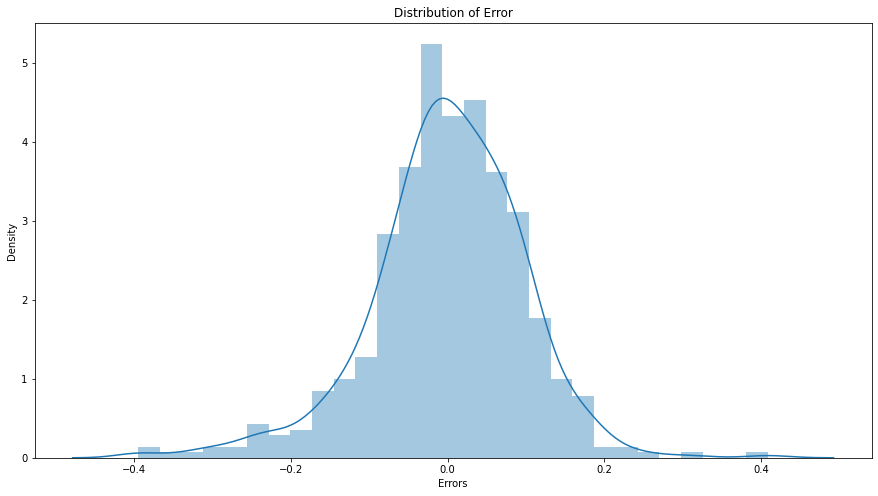

In [57]:
plt.figure(figsize=(15,8))
diff = y_train - y_train_pred
sns.distplot(diff)
plt.title('Distribution of Error')
plt.xlabel('Errors')
plt.show()

We could see that the distribution of error values follow a normal distribution with mean very close to zero. This indicates that the model complies to one of the assumptions for linear regression i.e. error terms are normally distributed.

Let us now check if the error terms show any pattern when plotted against the predicted values.

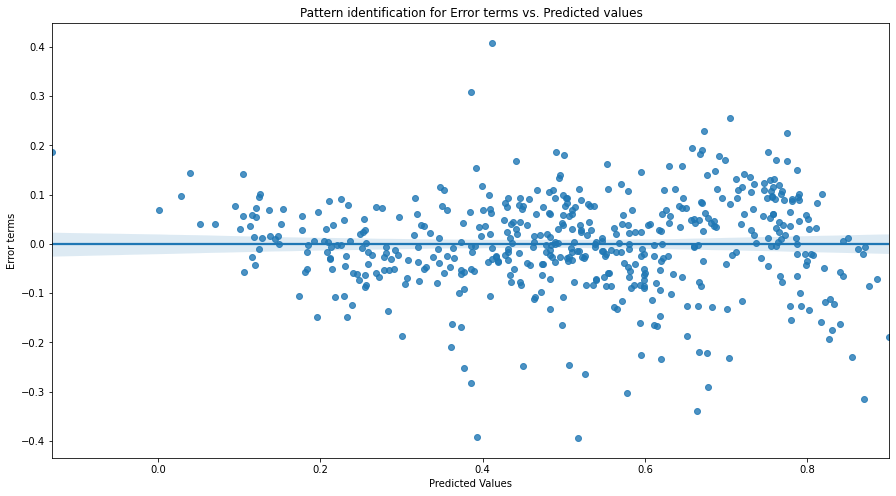

In [58]:
plt.figure(figsize=(15,8))
sns.regplot(x=y_train_pred, y=diff)
plt.title('Pattern identification for Error terms vs. Predicted values')
plt.xlabel('Predicted Values')
plt.ylabel('Error terms')
plt.show()

Also, let us quantify the linear relationship between the error terms and predicted values.

In [59]:
print("Pearson correlation coefficient:",diff.corr(y_train_pred))

Pearson correlation coefficient: 3.2202072960636134e-16


We do not see any noticeable pattern from the above graph. Also, the Pearson coefficient is very small meaning almost no linear relationship between the error terms and predicted values. This satisfies another assumption of linear regression which says there should not be any noticeable pattern in the error terms.

Now, let us check another property of linear regression, which is Homoscedasticity. For this, let us plot the values `y_train` and `y_train_pred` in a graph and check if the distribution of values is evenly spread out in each region and check if we could observe equal variance across graph.

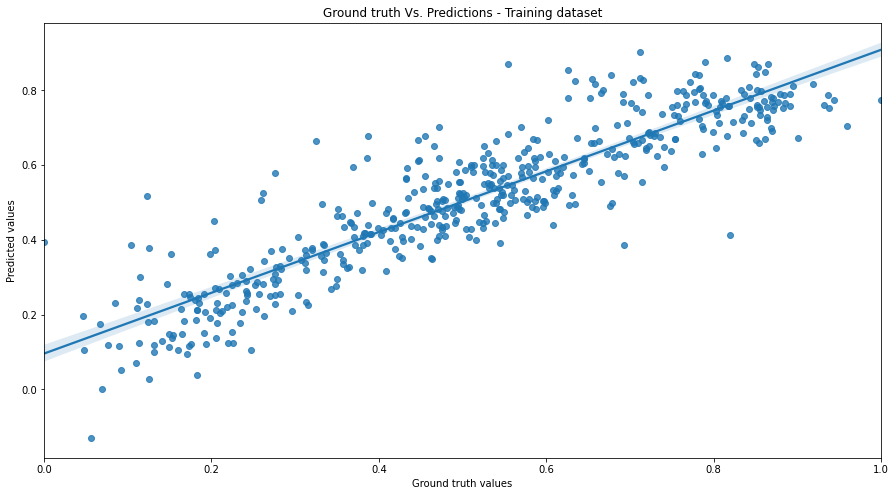

In [60]:
plt.figure(figsize=(15,8))
sns.regplot(x=y_train, y=y_train_pred)
plt.title('Ground truth Vs. Predictions - Training dataset')
plt.xlabel('Ground truth values')
plt.ylabel('Predicted values')
plt.show()

The above graph shows the values are equally spread out. This conveys that the error terms have approximately equal variance across the regression line in the plot. Thus the model complies with the assumption of Homoscedasticity.

## Prediction and Evaluation on the Test Set

First, let us scale the variables in the test set

In [61]:
test_data[variables] = scaler.transform(test_data[variables])

test_data[variables].describe() # checking the numerical distibution of values for the scaled variables.

,cnt,atemp,hum,windspeed
count,220.000000,220.000000,220.000000,220.000000
mean,0.527607,0.529897,0.563568,0.347061
std,0.218914,0.207010,0.188369,0.163480
min,0.069144,0.025950,-0.242604,0.047441
25%,0.391797,0.362808,0.434507,0.224357
50%,0.522204,0.562887,0.561323,0.316036
75%,0.659888,0.697769,0.703738,0.441037
max,0.981707,0.951946,1.012910,0.808970


We could see that the min and max values are close to 0 and 1 respectively.

In [62]:
y_test = test_data.pop('cnt') # Removing target variable "cnt" and setting "cnt" as the target variable
X_test = test_data

In [63]:
print("Test data shape:", X_test.shape)
print("Test target shape:", y_test.shape)

Test data shape: (220, 28)
Test target shape: (220,)


Now, predicting the target variables for the test dataset.

In [64]:
X_test_sm = sm.add_constant(X_test[selected_variables])
y_pred = model_7.predict(X_test_sm)

Finding the R-squared value for test dataset

In [65]:
print("R-squared value for test dataset:", r2_score(y_test,y_pred))

R-squared value for test dataset: 0.8198668192895701


The R-squared of the test dataset (0.820) is very close to the R-squared of the train dataset (0.813). This shows the model has trained well without overfitting.

Let us plot y_test and y_pred to understand the spread

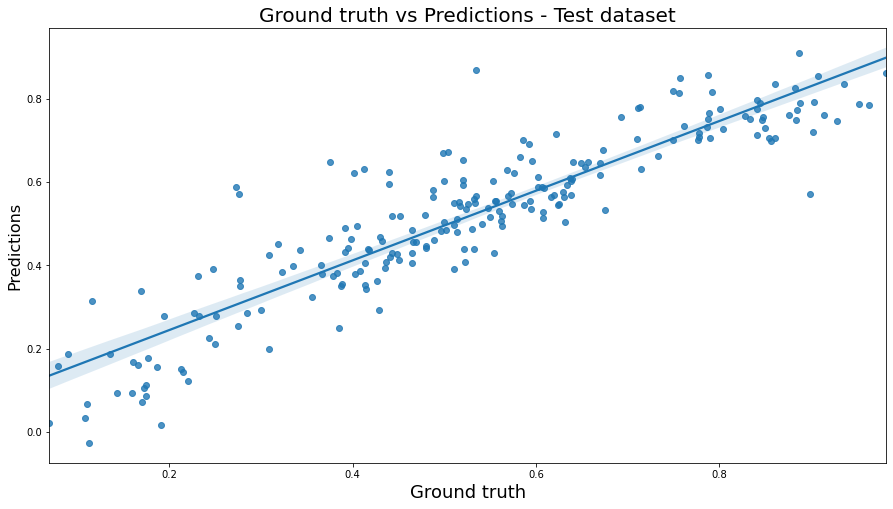

In [66]:
plt.figure(figsize=(15,8))
sns.regplot(y_test, y_pred)
plt.title('Ground truth vs Predictions - Test dataset', fontsize=20)
plt.xlabel('Ground truth', fontsize=18)
plt.ylabel('Predictions', fontsize=16)
plt.show()

The graph shows a good correlation between the y_test and y_pred.

We can see that the equation of our best fitted line is:

In [67]:
print('cnt = ' + ' + '.join([x + ' x ' + str(round(y, 3)) for x, y in zip(model_7.params.index, model_7.params.values)]))

cnt = const x 0.108 + yr x 0.228 + holiday x -0.09 + atemp x 0.597 + windspeed x -0.124 + summer x 0.084 + winter x 0.126 + sep x 0.098 + misty x -0.078 + snowy x -0.267


The important variables and their coefficients in the model are.

In [68]:
model_7.params.sort_values(ascending=False)

atemp        0.597421
yr           0.228367
winter       0.126403
const        0.108446
sep          0.097746
summer       0.084384
misty       -0.078015
holiday     -0.090030
windspeed   -0.123642
snowy       -0.267234
dtype: float64

## Inference

- The demand of bikes is highly influenced by "atemp" variable. People tend to rent bikes when the temperature is on the higher side.
- Since the demand for the bikes has increased naturally over time, we could see the influence of "yr" variable on the target variable. This shows that, the demand for bikes would increase even if the company does nothing new provided if all the other factors remain the same.
- The demand of bikes is slightly increased in the winter and summer season.
- Misty and snowy weather conditions reduces the demand for bikes.
- Higher windspeed reduces the demand for bikes.
- Interestingly, if the day is a holiday, the demand for bike reduces slightly.